In [1]:
import os
import datetime
import pandas as pd
from sqlalchemy import create_engine
import psycopg2
from dotenv import load_dotenv
import urllib.parse
import matplotlib.pyplot as plt

load_dotenv()
POSTGRES_USERNAME = os.environ.get('JDB_USER')
POSTGRES_PASSWORD = os.environ.get('JDB_PASSWORD')
POSTGRES_ADDRESS = os.environ.get('JDB_HOST')
POSTGRES_PORT = 5432
POSTGRES_DBNAME = os.environ.get('JDB_NAME')
postgres_str = ('postgresql://{username}:{password}@{ipaddress}:{port}/{dbname}'.format(username=POSTGRES_USERNAME, password=POSTGRES_PASSWORD, ipaddress=POSTGRES_ADDRESS, port=POSTGRES_PORT, dbname=POSTGRES_DBNAME))
cnx = create_engine(postgres_str)

In [2]:
stays = pd.read_sql_query('select * from stays_summarized where is_pretrial = 1 and not_primary_custodian = 0 and use_flag = 1 and start_date >= \'2022-01-23\' and start_date < \'2023-01-22\' order by start_date asc;', cnx)
stays_complete = stays[stays['end_date'].notnull()]
stays

,defendant_id,name,gender,race,start_date,end_date,days,rank,is_pretrial,violent,dwi,drugs,not_primary_custodian,violation,use_flag
0,16849,"FULLER, DARREN DARREL",M,B,2022-01-23,2022-01-24,2.0,4,1,1,0,0,0,0,1
1,16748,"BROWNE, RICHARD SAMUEL",M,W,2022-01-23,2022-01-24,2.0,3,1,0,0,0,0,0,1
2,16793,"CRADDUCK, KRYSTAL SUZANNE",F,W,2022-01-23,2022-01-23,1.0,3,1,0,0,1,0,0,1
3,17035,"PERKINS, ALEXANDER ALEXANDROVICH",M,W,2022-01-23,2022-11-07,289.0,8,1,1,0,0,0,0,1
4,16873,"HAGAN, CHRISTOPHER GENE",M,W,2022-01-23,2022-03-30,67.0,3,1,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4195,177516,"BREEDLOVE, JUSTIN MICHAEL",M,W,2023-01-21,2023-02-17,28.0,0,1,0,0,0,0,1,1
4196,177481,"ALEXANDER, JACOB HARRISON",M,W,2023-01-21,2023-03-28,67.0,10,1,0,0,0,0,0,1
4197,177678,"KNIGHTON, DAVID ADAM",M,W,2023-01-21,2023-03-08,47.0,0,1,0,0,0,0,1,1
4198,177759,"PHILLIPS, SARAH ELIZABETH",F,W,2023-01-21,2023-03-08,47.0,6,1,1,0,1,0,0,1


In [3]:
b = stays.sort_values(by=["rank"], ascending=True)
b = b.groupby("rank", as_index=True)["rank"].count().sort_index()
b.index.name = 'Rank'
b.columns = ['Count']
b.index = ['Other', 'M-3', 'M-2', 'M-1', 'M-A1', 'I', 'H', 'G', 'F', 'E', 'D', 'C', 'B2', 'B1', 'A']
b

Other    593
M-3      274
M-2      514
M-1      626
M-A1     539
I        440
H        685
G         71
F         91
E         49
D         47
C        207
B2        39
B1        15
A         10
Name: rank, dtype: int64

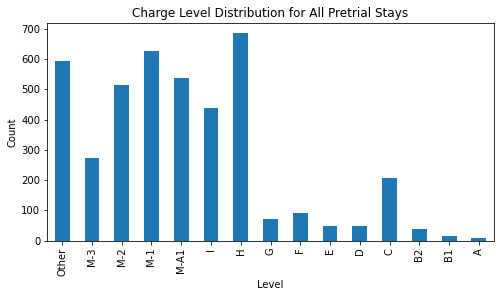

In [21]:
b.plot.bar(title='Charge Level Distribution for All Pretrial Stays', figsize=[8,4], xlabel='Level', ylabel='Count')
plt.savefig('/Users/ejaxon/development/jail/charge-level-distribution-all-pretrial-stays.png', bbox_inches='tight')

,0
Other,593
Misdemeanors,1953
Low Felonies,1125
High Felonies,529


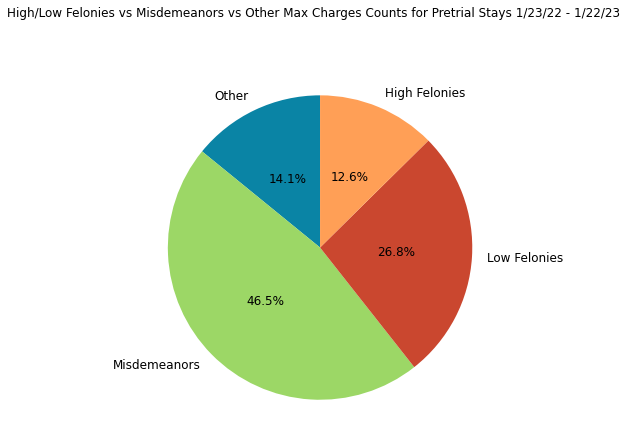

In [25]:
colors = ['#0a84a5', '#9cd766', '#ca472f', '#ff9f56', '#8cddd0', '#f6c85f', '#6f4d7c', ]
bsum = pd.DataFrame([b.iloc[0], b.iloc[1:5].sum(), b.iloc[5:7].sum(), b.iloc[7:].sum()])
bsum.index = ['Other', 'Misdemeanors', 'Low Felonies', 'High Felonies']
bsum
bsum.plot.pie(subplots=True, ylabel='', legend=False, autopct='%1.1f%%', figsize=[7,7],
              startangle=90, fontsize=12, pctdistance=.5, colors=colors,
#              counterclock=False,
              title='High/Low Felonies vs Misdemeanors vs Other Max Charges Counts for Pretrial Stays 1/23/22 - 1/22/23')
plt.savefig('/Users/ejaxon/development/jail/charge-type-distribution-all-pretrial-stays.png', bbox_inches='tight')
bsum


<AxesSubplot:title={'center':'Charge Level Distribution for All Pretrial Stays'}>

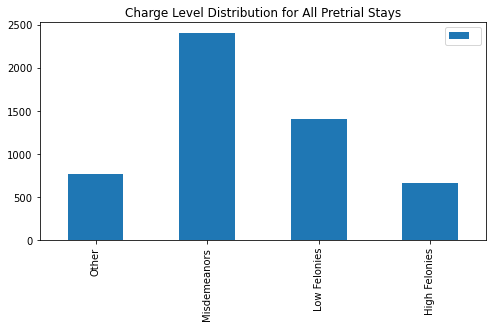

In [17]:
bsum.plot.bar(title='Charge Level Distribution for All Pretrial Stays', figsize=[8,4])